**Drew Grant**

In this script I use English Premier League Data to predict the season table with a neural network model.  

In [0]:
import numpy as np
from scipy import stats as st
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.linear_model as lm
import sklearn as skl
import statsmodels.formula.api as smf
import statsmodels as sm
## this sets some style parameters
sns.set()

# Data
## 1. load the data using pandas into a dataframe


In [0]:
epl_14_15 = pd.read_csv('https://raw.githubusercontent.com/drewgrant/BME_Data_Science/master/season-1415_csv.csv')
epl_15_16 = pd.read_csv('https://raw.githubusercontent.com/drewgrant/BME_Data_Science/master/season-1516_csv.csv')
epl_16_17 = pd.read_csv('https://raw.githubusercontent.com/drewgrant/BME_Data_Science/master/season-1617_csv.csv')
epl_17_18 = pd.read_csv('https://raw.githubusercontent.com/drewgrant/BME_Data_Science/master/season-1718_csv.csv')
epl_16_17.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,LBD,LBA,PSH,PSD,PSA,WHH,WHD,WHA,VCH,VCD,VCA,Bb1X2,BbMxH,BbAvH,BbMxD,BbAvD,BbMxA,BbAvA,BbOU,BbMx>2.5,BbAv>2.5,BbMx<2.5,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSCH,PSCD,PSCA
0,E0,13/08/16,Burnley,Swansea,0,1,A,0,0,D,J Moss,10,17,3,9,10,14,7,4,3,2,0,0,2.40,3.3,3.25,2.45,3.1,2.95,2.50,3.3,2.65,2.45,3.25,3.10,2.47,3.32,3.19,2.50,3.20,2.90,2.50,3.2,3.25,55,2.55,2.43,3.35,3.21,3.30,3.10,40,2.40,2.30,1.68,1.61,32,-0.25,2.13,2.06,1.86,1.81,2.79,3.16,2.89
1,E0,13/08/16,Crystal Palace,West Brom,0,1,A,0,0,D,C Pawson,14,13,4,3,12,15,3,6,2,2,0,0,2.00,3.3,4.50,2.00,3.2,3.90,2.10,3.3,3.30,2.00,3.25,4.33,2.06,3.29,4.32,2.05,3.10,4.00,2.00,3.3,4.40,56,2.10,2.01,3.40,3.23,4.50,4.16,38,2.68,2.50,1.60,1.52,33,-0.50,2.07,2.00,1.90,1.85,2.25,3.15,3.86
2,E0,13/08/16,Everton,Tottenham,1,1,D,1,0,H,M Atkinson,12,13,6,4,10,14,5,6,0,0,0,0,3.20,3.4,2.40,2.95,3.2,2.40,2.65,3.3,2.50,3.10,3.40,2.40,3.25,3.43,2.37,3.10,3.10,2.40,3.25,3.4,2.38,55,3.30,3.12,3.45,3.32,2.50,2.36,41,2.12,2.05,1.87,1.77,32,0.25,1.91,1.85,2.09,2.00,3.64,3.54,2.16
3,E0,13/08/16,Hull,Leicester,2,1,H,1,0,H,M Dean,14,18,5,5,8,17,5,3,2,2,0,0,4.50,3.6,1.91,4.33,3.4,1.90,3.30,3.3,2.10,4.50,3.50,1.91,4.43,3.55,1.95,4.20,3.25,1.95,4.40,3.5,1.95,55,4.50,4.17,3.60,3.43,2.33,1.95,40,2.30,2.19,1.74,1.67,31,0.25,2.35,2.26,2.03,1.67,4.68,3.50,1.92
4,E0,13/08/16,Man City,Sunderland,2,1,H,1,0,H,R Madley,16,7,4,3,11,14,9,6,1,2,0,0,1.25,6.5,15.00,1.22,6.0,11.50,1.25,5.5,10.30,1.25,6.50,13.00,1.27,6.48,13.15,1.25,5.50,13.00,1.25,6.5,15.00,56,1.30,1.25,6.80,6.11,15.00,12.55,39,1.56,1.53,2.67,2.48,34,-1.50,1.81,1.73,2.20,2.14,1.25,6.50,14.50


In [0]:
print('Number of data rows season 14-15 (games):', len(epl_14_15))
print('Number of data rows  season 15-16 (games):', len(epl_15_16))
print('Number of data rows  season 16-17 (games):', len(epl_16_17))
print('Number of data rows  season 17-18 (games):', len(epl_17_18))

Number of data rows season 14-15 (games): 380
Number of data rows  season 15-16 (games): 380
Number of data rows  season 16-17 (games): 380
Number of data rows  season 17-18 (games): 380


In [0]:
teams_14_15 = epl_14_15.HomeTeam.unique()
print('Number of Teams season 14-15:',len(teams_14_15))
print(teams_14_15)

teams_15_16 = epl_15_16.HomeTeam.unique()
print('Number of Teams season 15-16:',len(teams_15_16))
print(teams_15_16)

teams_16_17 = epl_16_17.HomeTeam.unique()
print('Number of Teams season 16-17:',len(teams_16_17))
print(teams_16_17)

teams_17_18 = epl_17_18.HomeTeam.unique()
print('Number of Teams season 17-18:',len(teams_17_18))
print(teams_17_18)

Number of Teams season 14-15: 20
['Arsenal' 'Leicester' 'Man United' 'QPR' 'Stoke' 'West Brom' 'West Ham'
 'Liverpool' 'Newcastle' 'Burnley' 'Aston Villa' 'Chelsea'
 'Crystal Palace' 'Everton' 'Southampton' 'Swansea' 'Hull' 'Sunderland'
 'Tottenham' 'Man City']
Number of Teams season 15-16: 20
['Bournemouth' 'Chelsea' 'Everton' 'Leicester' 'Man United' 'Norwich'
 'Arsenal' 'Newcastle' 'Stoke' 'West Brom' 'Aston Villa' 'Southampton'
 'Sunderland' 'Swansea' 'Tottenham' 'Watford' 'West Ham' 'Crystal Palace'
 'Man City' 'Liverpool']
Number of Teams season 16-17: 20
['Burnley' 'Crystal Palace' 'Everton' 'Hull' 'Man City' 'Middlesbrough'
 'Southampton' 'Arsenal' 'Bournemouth' 'Chelsea' 'Man United' 'Leicester'
 'Stoke' 'Swansea' 'Tottenham' 'Watford' 'West Brom' 'Sunderland'
 'West Ham' 'Liverpool']
Number of Teams season 17-18: 20
['Arsenal' 'Brighton' 'Chelsea' 'Crystal Palace' 'Everton' 'Southampton'
 'Watford' 'West Brom' 'Man United' 'Newcastle' 'Bournemouth' 'Burnley'
 'Leicester' 'Liv

## 2. Process, organize and format the data. This includes, handling missing data, reshaping data for analysis, dealing with dates or structured data formats etc

Data Field Descriptions:
* Div = League Division
* Date = Match Date (dd/mm/yy)
* HomeTeam = Home Team
* AwayTeam = Away Team
* FTHG = Full Time Home Team Goals
* FTAG = Full Time Away Team Goals
* FTR and Res = Full Time Result (H=Home Win, D=Draw, A=Away Win)
* HTHG = Half Time Home Team Goals
* HTAG = Half Time Away Team Goals
* HTR = Half Time Result (H=Home Win, D=Draw, A=Away Win)

* HS = Home Team Shots
* AS = Away Team Shots
* HST = Home Team Shots on Target
* AST = Away Team Shots on Target
* HC = Home Team Corners
* AC = Away Team Corners
* HF = Home Team Fouls Committed
* AF = Away Team Fouls Committed
* HY = Home Team Yellow Cards
* AY = Away Team Yellow Cards
* HR = Home Team Red Cards
* AR = Away Team Red Cards

lets remove the home/away team distinction and make that a seperate column but have each team stats be split up


In [0]:
stats1 = epl_14_15[['HomeTeam','AwayTeam','FTR','FTHG','FTAG', 'HS', 'AS', 'HST', 'AST', 'HC', 'AC', 'HF', 'AF', 'HY', 'AY', 'HR', 'AR']]
stats1 = stats1.rename(columns={'FTR': 'Result', 'FTHG': 'HomeGoals', 'FTAG': 'AwayGoals', 'HS': 'HomeShots', 'AS': 'AwayShots', 'HST': 'HomeShotsOnTarget', 'AST': 'AwayShotsOnTarget', 'HC':'HomeCorners', 'AC': 'AwayCorners', 'HF': 'HomeFouls', 'AF': 'AwayFouls', 'HC': 'HomeCorners', 'AC':'AwayCorners', 'HY': 'HomeYellowCards', 'AY': 'AwayYellowCards', 'HR': 'HomeRedCards', 'AR':'AwayRedCards'  })

stats2 = epl_15_16[['HomeTeam','AwayTeam','FTR','FTHG','FTAG', 'HS', 'AS', 'HST', 'AST', 'HC', 'AC', 'HF', 'AF', 'HY', 'AY', 'HR', 'AR']]
stats2 = stats2.rename(columns={'FTR': 'Result', 'FTHG': 'HomeGoals', 'FTAG': 'AwayGoals', 'HS': 'HomeShots', 'AS': 'AwayShots', 'HST': 'HomeShotsOnTarget', 'AST': 'AwayShotsOnTarget', 'HC':'HomeCorners', 'AC': 'AwayCorners', 'HF': 'HomeFouls', 'AF': 'AwayFouls', 'HC': 'HomeCorners', 'AC':'AwayCorners', 'HY': 'HomeYellowCards', 'AY': 'AwayYellowCards', 'HR': 'HomeRedCards', 'AR':'AwayRedCards'  })

stats3 = epl_16_17[['HomeTeam','AwayTeam','FTR','FTHG','FTAG', 'HS', 'AS', 'HST', 'AST', 'HC', 'AC', 'HF', 'AF', 'HY', 'AY', 'HR', 'AR']]
stats3 = stats3.rename(columns={'FTR': 'Result', 'FTHG': 'HomeGoals', 'FTAG': 'AwayGoals', 'HS': 'HomeShots', 'AS': 'AwayShots', 'HST': 'HomeShotsOnTarget', 'AST': 'AwayShotsOnTarget', 'HC':'HomeCorners', 'AC': 'AwayCorners', 'HF': 'HomeFouls', 'AF': 'AwayFouls', 'HC': 'HomeCorners', 'AC':'AwayCorners', 'HY': 'HomeYellowCards', 'AY': 'AwayYellowCards', 'HR': 'HomeRedCards', 'AR':'AwayRedCards'  })

stats4 = epl_17_18[['HomeTeam','AwayTeam','FTR','FTHG','FTAG', 'HS', 'AS', 'HST', 'AST', 'HC', 'AC', 'HF', 'AF', 'HY', 'AY', 'HR', 'AR']]
stats4 = stats4.rename(columns={'FTR': 'Result', 'FTHG': 'HomeGoals', 'FTAG': 'AwayGoals', 'HS': 'HomeShots', 'AS': 'AwayShots', 'HST': 'HomeShotsOnTarget', 'AST': 'AwayShotsOnTarget', 'HC':'HomeCorners', 'AC': 'AwayCorners', 'HF': 'HomeFouls', 'AF': 'AwayFouls', 'HC': 'HomeCorners', 'AC':'AwayCorners', 'HY': 'HomeYellowCards', 'AY': 'AwayYellowCards', 'HR': 'HomeRedCards', 'AR':'AwayRedCards'  })

stats3.head()


,HomeTeam,AwayTeam,Result,HomeGoals,AwayGoals,HomeShots,AwayShots,HomeShotsOnTarget,AwayShotsOnTarget,HomeCorners,AwayCorners,HomeFouls,AwayFouls,HomeYellowCards,AwayYellowCards,HomeRedCards,AwayRedCards
0,Burnley,Swansea,A,0,1,10,17,3,9,7,4,10,14,3,2,0,0
1,Crystal Palace,West Brom,A,0,1,14,13,4,3,3,6,12,15,2,2,0,0
2,Everton,Tottenham,D,1,1,12,13,6,4,5,6,10,14,0,0,0,0
3,Hull,Leicester,H,2,1,14,18,5,5,5,3,8,17,2,2,0,0
4,Man City,Sunderland,H,2,1,16,7,4,3,9,6,11,14,1,2,0,0


## 3. do some basic marginal and scatterplots or basic table summaries of the data

In [0]:
stats3.describe()

,HomeGoals,AwayGoals,HomeShots,AwayShots,HomeShotsOnTarget,AwayShotsOnTarget,HomeCorners,AwayCorners,HomeFouls,AwayFouls,HomeYellowCards,AwayYellowCards,HomeRedCards,AwayRedCards
count,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000
mean,1.597368,1.202632,14.013158,11.484211,4.813158,3.855263,5.678947,4.734211,11.063158,11.657895,1.744737,1.886842,0.055263,0.052632
std,1.306971,1.227862,5.878033,5.019462,2.817086,2.383452,3.084916,2.702562,3.468853,3.556378,1.256371,1.301647,0.240050,0.223591
min,0.000000,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,10.000000,8.000000,3.000000,2.000000,3.000000,3.000000,9.000000,9.000000,1.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,13.000000,11.000000,4.000000,3.000000,5.000000,4.000000,11.000000,12.000000,2.000000,2.000000,0.000000,0.000000
75%,2.000000,2.000000,17.000000,14.000000,6.000000,5.000000,8.000000,6.000000,13.000000,14.000000,3.000000,3.000000,0.000000,0.000000
max,6.000000,7.000000,37.000000,29.000000,17.000000,15.000000,19.000000,15.000000,24.000000,24.000000,6.000000,6.000000,2.000000,1.000000


In [0]:
hist, bin_edges = np.histogram(stats3.HomeGoals)

Text(0, 0.5, 'Count')

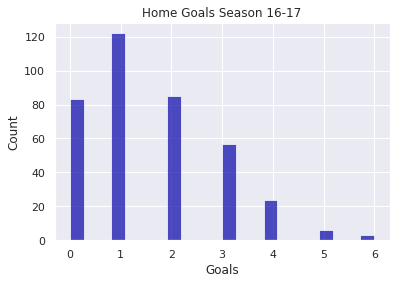

In [0]:
plt.hist(x=stats3.HomeGoals, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=1);
plt.title('Home Goals Season 16-17')
plt.xlabel('Goals')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

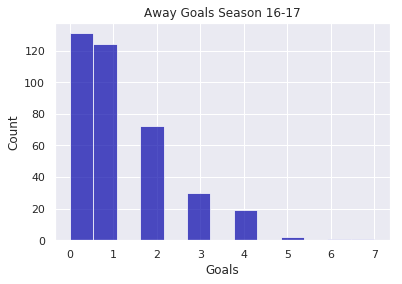

In [0]:
plt.hist(x=stats3.AwayGoals, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=1);
plt.title('Away Goals Season 16-17')
plt.xlabel('Goals')
plt.ylabel('Count')

In [0]:
def arrange_team_stats(season_stats, teams):
  num = 0
  teams_stats = []
  for i in range (0,len(teams)):
#     print('Team Number',i, 'is', season_stats.HomeTeam[i])
  #   if stats.HomeTeam[stats.HomeTeam == teams[i]] == teams[i]:
    index =  season_stats.index[(season_stats.loc[:,'HomeTeam'] == teams[i]) | (season_stats.loc[:,'AwayTeam'] == teams[i]) ] 
    indices = np.array(index, dtype='int')
    teams_stats.append([])
  #   print(indices)
    for j in range (0,len(indices)):
      teams_stats[i].append(season_stats.iloc[indices[j]])
  return teams_stats

In [0]:
season14 = arrange_team_stats(stats1, teams_14_15)

In [0]:
season15 = arrange_team_stats(stats2, teams_15_16)

In [0]:
season16 = arrange_team_stats(stats3, teams_16_17)

In [0]:
season17 = arrange_team_stats(stats4, teams_17_18)

In [0]:
# print(season14[0][1])

In [0]:
print('Home Goals scored by', season14[0][1][0], 'against', season14[0][1][1], ':', season14[0][1][3])

Home Goals scored by Everton against Arsenal : 2


For features, I will extract Goals, Shots, Corners, and Fouls 

In [0]:
def feature_extractor(season_stats, team):
  team_stats = season_stats
  teams = team
  shapee = (20,4) 
  features = np.zeros(shapee)
  for i in range (0,len(team_stats)):
#     print('Team:', teams[i])
    for j in range (0, len(team_stats[i])):
      if (team_stats[i][j][0] == teams[i]): #home
        features[i, 0] += team_stats[i][j][3] #home goals
        features[i, 1] += team_stats[i][j][5] #home shots
        features[i, 2] += team_stats[i][j][9] #home corners
        features[i, 3] += team_stats[i][j][11] #home fouls
      elif (team_stats[i][j][1] == teams[i]): #away
        features[i, 0] += team_stats[i][j][4] #away goals
        features[i, 1] += team_stats[i][j][6] #away shots
        features[i, 2] += team_stats[i][j][10] #away corners
        features[i, 3] += team_stats[i][j][12] #away fouls
#     print('     Points:', team_points[i])
  return features

In [0]:
features = feature_extractor(season14, teams_14_15)
features.shape
features14 = pd.DataFrame({'Teams': teams_14_15, 'Goals': features[:, 0], 'Shots': features[:, 1], 'Corners': features[:, 2], 'Fouls': features[:, 3] })
features14.head()

,Teams,Goals,Shots,Corners,Fouls
0,Arsenal,71.0,612.0,254.0,377.0
1,Leicester,46.0,457.0,211.0,457.0
2,Man United,62.0,509.0,213.0,453.0
3,QPR,42.0,533.0,179.0,447.0
4,Stoke,48.0,501.0,192.0,486.0


In [0]:
features = feature_extractor(season15, teams_15_16)
features.shape
features15 = pd.DataFrame({'Teams': teams_15_16, 'Goals': features[:, 0], 'Shots': features[:, 1], 'Corners': features[:, 2], 'Fouls': features[:, 3] })

In [0]:
features = feature_extractor(season15, teams_16_17)
features.shape
features16 = pd.DataFrame({'Teams': teams_16_17, 'Goals': features[:, 0], 'Shots': features[:, 1], 'Corners': features[:, 2], 'Fouls': features[:, 3] })

In [0]:
features = feature_extractor(season15, teams_17_18)
features.shape
features17 = pd.DataFrame({'Teams': teams_17_18, 'Goals': features[:, 0], 'Shots': features[:, 1], 'Corners': features[:, 2], 'Fouls': features[:, 3] })

Combine features from all seasons: 

In [0]:
# teamss = list(zip(teams_14_15, teams_15_16, teams_16_17, teams_17_18))
# teamss = teams_14_15 + teams_15_16 + teams_16_17 + teams_17_18
teams = list(teams_14_15)
teams.extend(list(teams_15_16))
teams.extend(list(teams_16_17))
teams.extend(list(teams_17_18))
print(teams)

['Arsenal', 'Leicester', 'Man United', 'QPR', 'Stoke', 'West Brom', 'West Ham', 'Liverpool', 'Newcastle', 'Burnley', 'Aston Villa', 'Chelsea', 'Crystal Palace', 'Everton', 'Southampton', 'Swansea', 'Hull', 'Sunderland', 'Tottenham', 'Man City', 'Bournemouth', 'Chelsea', 'Everton', 'Leicester', 'Man United', 'Norwich', 'Arsenal', 'Newcastle', 'Stoke', 'West Brom', 'Aston Villa', 'Southampton', 'Sunderland', 'Swansea', 'Tottenham', 'Watford', 'West Ham', 'Crystal Palace', 'Man City', 'Liverpool', 'Burnley', 'Crystal Palace', 'Everton', 'Hull', 'Man City', 'Middlesbrough', 'Southampton', 'Arsenal', 'Bournemouth', 'Chelsea', 'Man United', 'Leicester', 'Stoke', 'Swansea', 'Tottenham', 'Watford', 'West Brom', 'Sunderland', 'West Ham', 'Liverpool', 'Arsenal', 'Brighton', 'Chelsea', 'Crystal Palace', 'Everton', 'Southampton', 'Watford', 'West Brom', 'Man United', 'Newcastle', 'Bournemouth', 'Burnley', 'Leicester', 'Liverpool', 'Stoke', 'Swansea', 'Huddersfield', 'Tottenham', 'Man City', 'West 

In [0]:
teams = np.array(teams)
teams = np.unique(teams)
print(teams)

['Arsenal' 'Aston Villa' 'Bournemouth' 'Brighton' 'Burnley' 'Chelsea'
 'Crystal Palace' 'Everton' 'Huddersfield' 'Hull' 'Leicester' 'Liverpool'
 'Man City' 'Man United' 'Middlesbrough' 'Newcastle' 'Norwich' 'QPR'
 'Southampton' 'Stoke' 'Sunderland' 'Swansea' 'Tottenham' 'Watford'
 'West Brom' 'West Ham']


In [0]:
s1 = features14
s2 = features15
s3 = features16
s4 = features17
seasons = 4 
shapee = (len(teams), 4, 4)
features = np.zeros(shapee)
for s in range (0, seasons):
  for i in range (0, len(teams)):
#     print(i)
    if s == 0:
      p = s1[s1['Teams'] == teams[i]]
#       print(p)
    elif s == 1:
      p = s2[s2['Teams'] == teams[i]]
#       print(p)
    elif s == 2:
      p = s3[s3['Teams'] == teams[i]]
#       print(p)
    elif s == 3:
      p = s4[s4['Teams'] == teams[i]]
#       print(p)
    if p.shape[0] == 0:
      0
    else:
#       print(p.loc[0][1:])
#       print((p.iloc[0][1:]).tolist())
      features[i][s] += (p.iloc[0][1:]).tolist()

In [0]:
print('The feature data is of size:',features.shape)
print('Where there are 26 teams, 4 features, and 4 seasons of data')

The feature data is of size: (26, 4, 4)
Where there are 26 teams, 4 features, and 4 seasons of data


In [0]:
shapee = (len(features), 4)
season1 = np.zeros(shapee)
season2 = np.zeros(shapee)
season3 = np.zeros(shapee)
season4 = np.zeros(shapee)

for i in range (0, len(features)):
  season1[i] = features[i,:, 0]
  season2[i] = features[i,:, 1]
  season3[i] = features[i,:, 2]
  season4[i] = features[i,:, 3]

In [0]:
feature_data = pd.DataFrame({'Team' : teams, 'Season 1 Goals': season1[:, 0], 'Season 1 Shots' : season1[:,1], 'Season 1 Corners' : season1[:,2], 'Season 1 Fouls' : season1[:,3],
                         'Season 2 Goals': season2[:, 0], 'Season 2 Shots' : season2[:,1], 'Season 2 Corners' : season2[:,2], 'Season 2 Fouls' : season2[:,3],
                         'Season 3 Goals': season3[:, 0], 'Season 3 Shots' : season3[:,1], 'Season 3 Corners' : season3[:,2], 'Season 3 Fouls' : season3[:,3],
                         'Season 4 Goals': season4[:, 0], 'Season 4 Shots' : season4[:,1], 'Season 4 Corners' : season4[:,2], 'Season 4 Fouls' : season4[:,3]})
# features.tail()

In [0]:
feature_data.shape

(26, 17)

The Labels will be the Premier League Table. The Premier League Table is a scoring system that determines the winner of the league by awarding 3 points to teams for every win, 1 point to teams for every draw, and 0 points for every loss. Below I will establish these labels by computing the league table in 2016-17.   

In [0]:
def table_points(teams_stats, team):
  teams = team
  team_points = np.zeros(20)
  for i in range (0,len(teams_stats)):
#     print('Team:', teams[i])
    for j in range (0, len(teams_stats[i])):
      if (teams_stats[i][j][0] == teams[i]) and (teams_stats[i][j][2] == 'H'):
        team_points[i] = team_points[i] + 3
      elif (teams_stats[i][j][0] == teams[i]) and (teams_stats[i][j][2] == 'D'):
        team_points[i] = team_points[i] + 1
      elif (teams_stats[i][j][1] == teams[i]) and (teams_stats[i][j][2] == 'A'):
        team_points[i] = team_points[i] + 3
      elif (teams_stats[i][j][1] == teams[i]) and (teams_stats[i][j][2] == 'D'):
        team_points[i] = team_points[i] + 1
#     print('     Points:', team_points[i])
  return team_points

In [0]:
season_points14 = table_points(season14, teams_14_15)

In [0]:
season_points15 = table_points(season15, teams_15_16)

In [0]:
season_points16 = table_points(season16, teams_16_17)

In [0]:
season_points17 = table_points(season17, teams_17_18)

Top teams in the Premier League in 2014-15: [(87.0, 'Chelsea'), (79.0, 'Man City'), (75.0, 'Arsenal')]


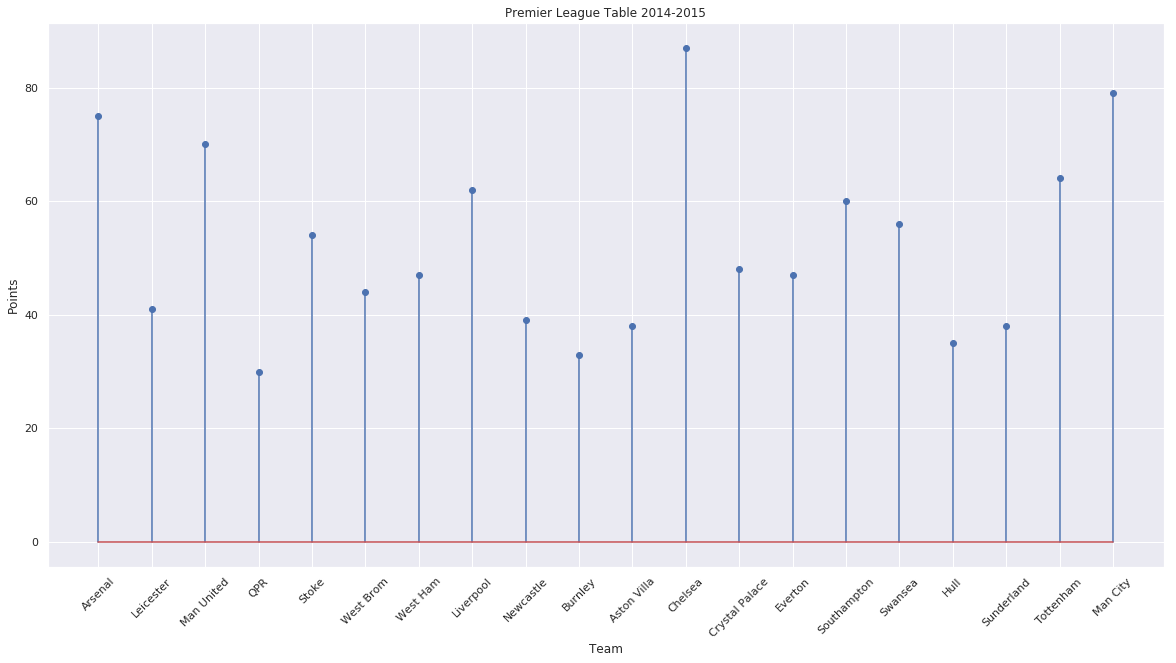

In [0]:
plt.figure(figsize=(20,10))
x = np.arange(20)
plt.xticks(x, teams_14_15, rotation=45)
plt.stem(x, season_points14)
plt.title('Premier League Table 2014-2015')
plt.xlabel('Team')
plt.ylabel('Points')
print('Top teams in the Premier League in 2014-15:', sorted( [(x,teams_14_15[i]) for (i,x) in enumerate(season_points14)], reverse=True )[:3] )

Top teams in the Premier League in 2015-16: [(81.0, 'Leicester'), (71.0, 'Arsenal'), (70.0, 'Tottenham')]


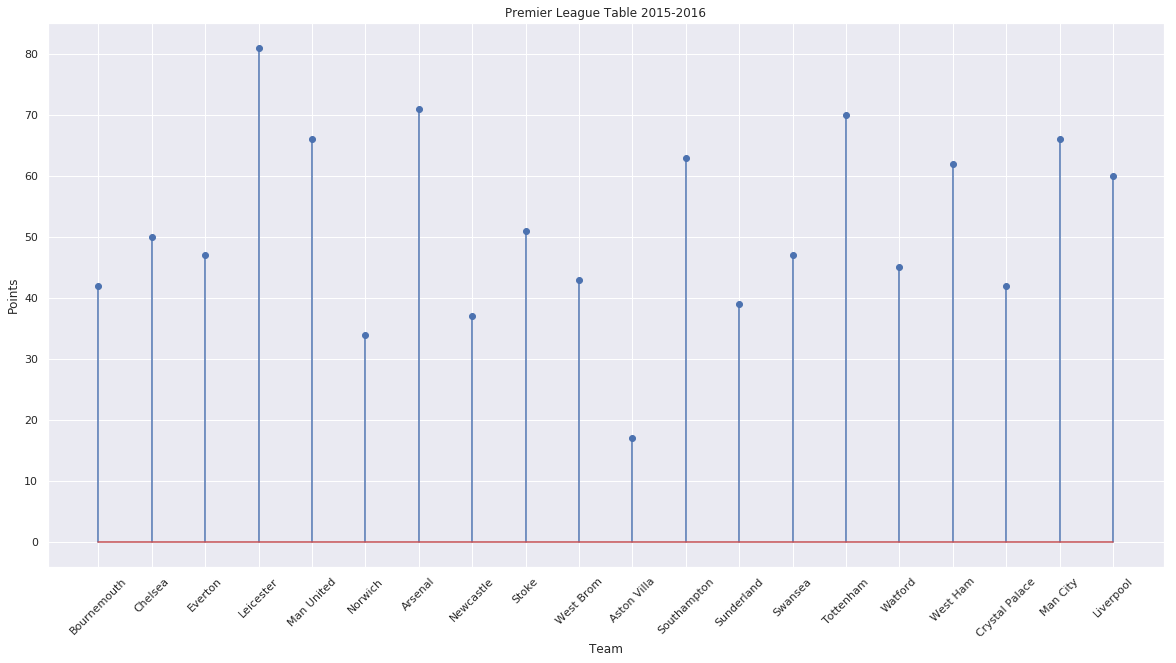

In [0]:
plt.figure(figsize=(20,10))
x = np.arange(20)
plt.xticks(x, teams_15_16, rotation=45)
plt.stem(x, season_points15)
plt.title('Premier League Table 2015-2016')
plt.xlabel('Team')
plt.ylabel('Points')
print('Top teams in the Premier League in 2015-16:', sorted( [(x,teams_15_16[i]) for (i,x) in enumerate(season_points15)], reverse=True )[:3] )

Top teams in the Premier League in 2016-17: [(93.0, 'Chelsea'), (86.0, 'Tottenham'), (78.0, 'Man City')]


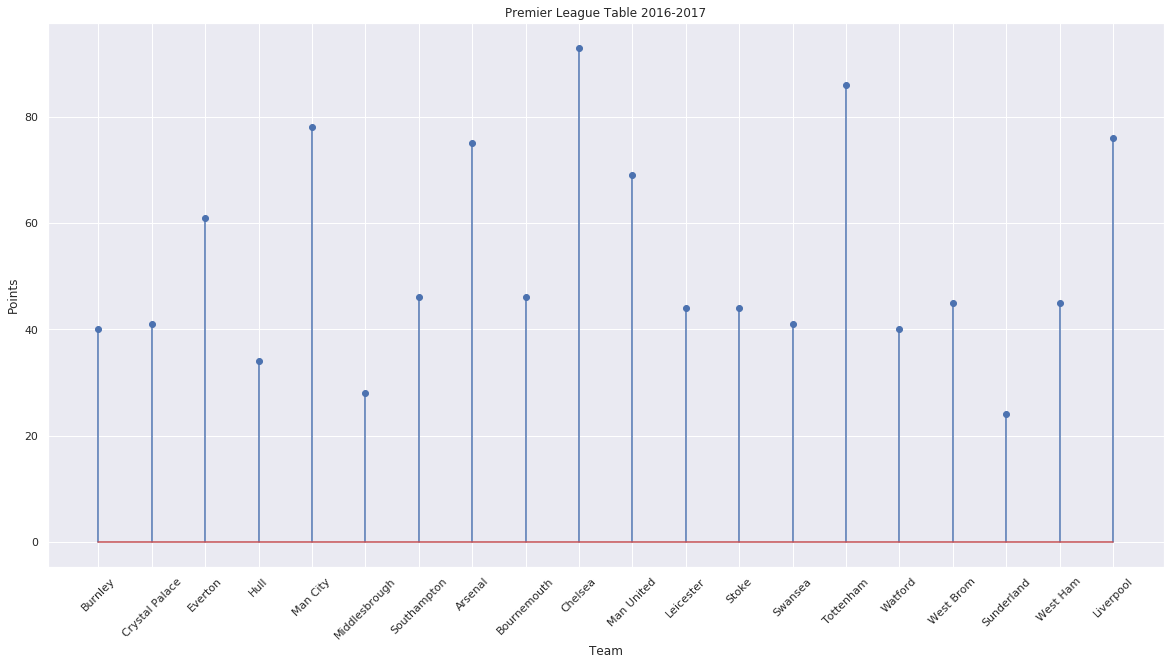

In [0]:
plt.figure(figsize=(20,10))
x = np.arange(20)
plt.xticks(x, teams_16_17, rotation=45)
plt.stem(x, season_points16)
plt.title('Premier League Table 2016-2017')
plt.xlabel('Team')
plt.ylabel('Points')
print('Top teams in the Premier League in 2016-17:', sorted( [(x,teams_16_17[i]) for (i,x) in enumerate(season_points16)], reverse=True )[:3] )

Top teams in the Premier League in 2017-18: [(100.0, 'Man City'), (81.0, 'Man United'), (77.0, 'Tottenham')]


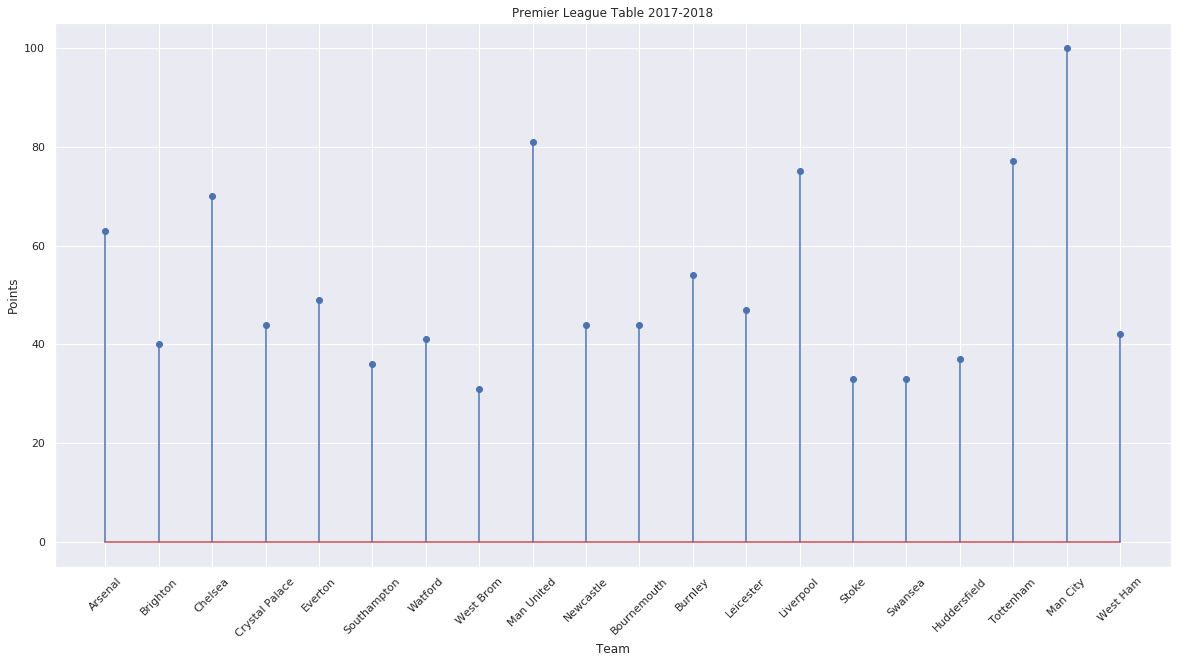

In [0]:
plt.figure(figsize=(20,10))
x = np.arange(20)
plt.xticks(x, teams_17_18, rotation=45)
plt.stem(x, season_points17)
plt.title('Premier League Table 2017-2018')
plt.xlabel('Team')
plt.ylabel('Points')
print('Top teams in the Premier League in 2017-18:', sorted( [(x,teams_17_18[i]) for (i,x) in enumerate(season_points17)], reverse=True )[:3] )

Now combine all the season tables from years 2014-2017 as training data labels to predict 2017-2018. 

In [0]:
s14 = pd.DataFrame({'Teams 14': teams_14_15 })
s14.insert(1, 'Points', season_points14)

s15 = pd.DataFrame({'Teams 15': teams_15_16 })
s15.insert(1, 'Points', season_points15)

s16 = pd.DataFrame({'Teams 16': teams_16_17 })
s16.insert(1, 'Points', season_points16)

s17 = pd.DataFrame({'Teams 17': teams_17_18 })
s17.insert(1, 'Points', season_points17)

# s14

Computes total points over seasons

In [0]:
# def table_points(s1, s2, s3, s4):
s1 = s14
s2 = s15
s3 = s16
s4 = s17
seasons = 4 
current_teams_points = [0]*len(teams)
for s in range (0, seasons):
  for i in range (0, len(teams)):
    if s == 0:
      p = s1[s1['Teams 14'] == teams[i]]
#       print(p)
    elif s == 1:
      p = s2[s2['Teams 15'] == teams[i]]
#       print(p)
    elif s == 2:
      p = s3[s3['Teams 16'] == teams[i]]
#       print(p)
    elif s == 3:
      p = s4[s4['Teams 17'] == teams[i]]
#       print(p)
    if (p['Points']).empty:
      0
    else:
      current_teams_points[i] = current_teams_points[i] + int(p['Points']) 

print('Points:', current_teams_points)


Points: [284, 55, 132, 40, 127, 300, 175, 204, 37, 69, 213, 273, 323, 286, 28, 120, 34, 30, 205, 182, 101, 177, 297, 126, 163, 196]


Points per season of all teams

In [0]:
# def table_points(s1, s2, s3, s4):
s1 = s14
s2 = s15
s3 = s16
s4 = s17
seasons = 4 
shapee = (len(teams), 4)
current_teams_points = np.zeros(shapee)
for s in range (0, seasons):
  for i in range (0, len(teams)):
    if s == 0:
      p = s1[s1['Teams 14'] == teams[i]]
#       print(p)
    elif s == 1:
      p = s2[s2['Teams 15'] == teams[i]]
#       print(p)
    elif s == 2:
      p = s3[s3['Teams 16'] == teams[i]]
#       print(p)
    elif s == 3:
      p = s4[s4['Teams 17'] == teams[i]]
#       print(p)
    if (p['Points']).empty:
      0
    else:
      current_teams_points[i][s] = int(p['Points'])
# print('Points:', current_teams_points)


In [0]:
season1 = [0]*len(current_teams_points)
season2 = [0]*len(current_teams_points)
season3 = [0]*len(current_teams_points)
season4 = [0]*len(current_teams_points)
for i in range (0, len(current_teams_points)):
  season1[i] = current_teams_points[i, 0]
  season2[i] = current_teams_points[i, 1]
  season3[i] = current_teams_points[i, 2]
  season4[i] = current_teams_points[i, 3]


In [0]:
labels = pd.DataFrame({'Season 1': season1, 'Season 2': season2, 'Season 3': season3, 'Season 4': season4,  })
labels.shape

(26, 4)

In [0]:
np.array(labels).shape

(26, 4)

# Model fitting


## 1. fit a multivariable linear, logistic or neural network model

In [0]:
import torch
x = torch.from_numpy(features)
y = torch.from_numpy(np.array(labels))

# ##pytorch wants type as float
x = x.float()
y = y.float()

xtraining = x[: :, 1]
xtesting = x[:, :, 2]
ytraining = y[:, 1]
ytesting = y[:, 2]

[
 xtraining.size(),
 ytraining.size(),
 xtesting.size(),
 ytesting.size(),
]

[torch.Size([26, 4]), torch.Size([26]), torch.Size([26, 4]), torch.Size([26])]

In [0]:
## Define the model
## Dimension of the hidden layer
H = 10

## Number of predictors
D_in = xtraining.size()[1]
D_out = 1

model = torch.nn.Sequential(
    torch.nn.Linear(D_in, H),
    torch.nn.ReLU(),
    torch.nn.Linear(H, D_out),
)

In [0]:
loss_fn = torch.nn.MSELoss(reduction='sum')
losses = []
learning_rate = 1e-4
for t in range(300):
    y_pred = model(xtraining)
    loss = loss_fn(y_pred, ytraining)
    losses.append(loss.item())
    if t % 100 == 99:
        print(t, loss.item())
    model.zero_grad()
    loss.backward()
    with torch.no_grad():
        for param in model.parameters():
            param -= learning_rate * param.grad

99 437880.8125
199 437870.90625
299 437869.75


/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:431: UserWarning: Using a target size (torch.Size([26])) that is different to the input size (torch.Size([26, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


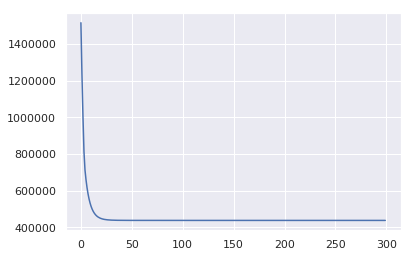

In [0]:
plt.plot(losses)

Text(0.5, 0, 'Predicted')

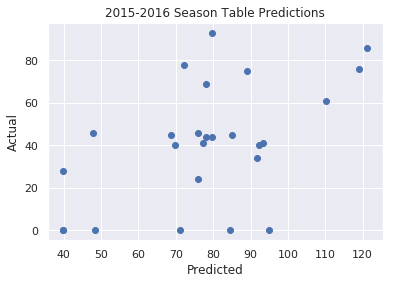

In [0]:
ytesting_pred = model(xtesting)
a = ytesting_pred.detach().numpy()
plt.scatter(a[:,0], ytesting[:])
plt.title('2015-2016 Season Table Predictions')
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [0]:
print('Predicted',teams[np.argmax(a)],' would win with', max(a), 'points.')
print('Actually', teams_15_16[np.argmax(season_points15)], 'won with', max(season_points15), 'points')

Predicted Tottenham  would win with [121.22178] points.
Actually Leicester won with 81.0 points


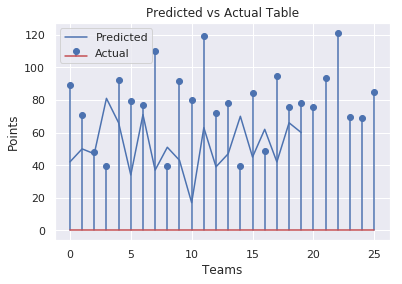

In [0]:
plt.stem(a)
plt.plot(season_points15)
plt.title('Predicted vs Actual Table')
plt.ylabel('Points')
plt.xlabel('Teams')
plt.legend(['Predicted', 'Actual'])

In [0]:
from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(a[:, 0], ytesting[:])
print('MAE:', MAE)

MAE: 38.673187


In [0]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(a, ytesting))
print('RMS:',rms)

RMS: 44.744593117842186
